In [1]:
import pandas as pd 

import matplotlib.pyplot as plt

# we use the scikit svm model for this experiment 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn import metrics

import scikitplot as skplt

In [2]:
df = pd.read_csv('./data/authority_dataset.csv').rename(columns={'auth': 'authority'})
df

,ad,authority
0,north korea officially has no corona cases how...,1
1,it seems difficult to stand for something one ...,0
2,senator bernie sanders held a rally with randy...,1
3,life gets busy—don’t wait to send back your ba...,0
4,some issues feel impossible to compromise on b...,1
...,...,...
49661,a recent poll shows sherrod with just a one po...,0
49662,today’s donor goal ⃣ ⃣ ⃣ our endofquarter dead...,0
49663,you’ve been selected after a year of chaos hat...,1
49664,after receiving the corona vaccine a video tha...,0


In [3]:
# vectorize testing and training data 
X_train, X_test, y_train,  y_test = train_test_split(df['ad'], df['authority'] , test_size = 0.33, random_state = 42)

In [4]:
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [5]:
# training the model using a linear kernal
clf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
clf.fit(X_train_tf, y_train)

SVC(gamma='auto', kernel='linear')

accuracy:   0.985
              precision    recall  f1-score   support

no authority       0.98      0.99      0.98      8190
   authority       0.99      0.98      0.98      8200

    accuracy                           0.98     16390
   macro avg       0.98      0.98      0.98     16390
weighted avg       0.98      0.98      0.98     16390

confusion matrix:
[[8131   59]
 [ 190 8010]]



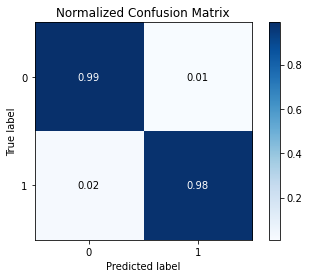

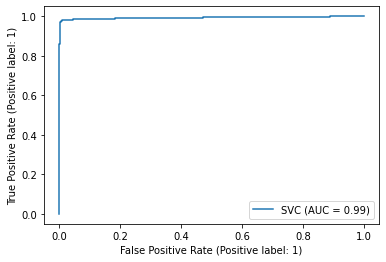

In [6]:
# predict the labels on validation dataset
predictions = clf.predict(X_test_tf)

# compute the performance measures
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['no authority', 'authority']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [7]:
df_val = pd.read_csv('./data/sample_auth.csv')
df_val

,ad,authority
0,How are health and climate change connected?Wa...,1
1,Crime is on the rise in California. Hear a cri...,1
2,Researchers at QIMR Berghofer are conducting a...,1
3,Hear a policy expert discuss how Prop 12 will ...,1
4,"As Toronto’s former chief of police, Mark Saun...",1
...,...,...
195,Families are often the foundation of a strong ...,0
196,Proven leadership you can count on. With nearl...,1
197,"If elected, the Ontario Liberals will implemen...",1
198,"If elected, the Ontario Liberals will implemen...",1


accuracy:   0.745
              precision    recall  f1-score   support

     no-auth       0.73      0.80      0.76       102
        auth       0.77      0.68      0.72        98

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200

confusion matrix:
[[82 20]
 [31 67]]



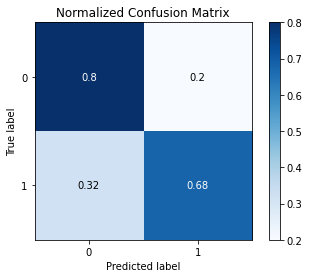

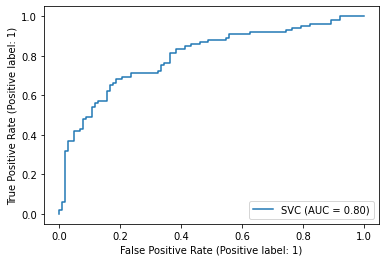

In [8]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['authority']
y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no-auth', 'auth']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)